In [53]:
import pandas as pd
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils.petri_utils import add_arc_from_to
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

In [107]:
from dataclasses import dataclass

@dataclass
class Process:
    name: str
    id: int

Pr1 = Process("P1", id=1)
Pr2 = Process("21", id=200)

In [129]:

net = PetriNet(name="Material_3_process_model")


T1 = PetriNet.Transition(name='P1', label='P1')
T2 = PetriNet.Transition(name='P2', label='P2')
T3 = PetriNet.Transition(name='P3', label='P3')
T4 = PetriNet.Transition(name='skip_10')
T5 = PetriNet.Transition(name='skip_11')
T6 = PetriNet.Transition(name='P4', label='P1')

P0 = PetriNet.Place(name="Source", properties="Source")
P2 = PetriNet.Place(name="State2", properties="State2")
P3 = PetriNet.Place(name="State3", properties="State3")
P4 = PetriNet.Place(name="State4", properties="State4")
P5 = PetriNet.Place(name="State5", properties="State5")
P6 = PetriNet.Place(name="State6", properties="State6")
P99 = PetriNet.Place(name="Sink", properties="Sink")

add_arc_from_to(P0, T1, net)
add_arc_from_to(P0, T5, net)
add_arc_from_to(T1, P4, net)
add_arc_from_to(T5, P2, net)
add_arc_from_to(T5, P3, net)
add_arc_from_to(P2, T2, net)
add_arc_from_to(P3, T3, net)
add_arc_from_to(T2, P5, net)
add_arc_from_to(T3, P6, net)
add_arc_from_to(P5, T4, net)
add_arc_from_to(P6, T4, net)
add_arc_from_to(T4, P4, net)
add_arc_from_to(P4, T6, net)
add_arc_from_to(T6, P99, net)



transitions = {T1, T2, T3, T4, T5, T6}
places = {P0, P2, P3, P4, P5, P6, P99}


for place in places:
    net.places.add(place)
for transition in transitions:
    net.transitions.add(transition)
im = Marking([P0])
fm = Marking([P99])
net

places: [ Sink, Source, State2, State3, State4, State5, State6 ]
transitions: [ (P1, 'P1'), (P2, 'P2'), (P3, 'P3'), (P4, 'P1'), (skip_10, None), (skip_11, None) ]
arcs: [ (P1, 'P1')->State4, (P2, 'P2')->State5, (P3, 'P3')->State6, (P4, 'P1')->Sink, (skip_10, None)->State4, (skip_11, None)->State2, (skip_11, None)->State3, Source->(P1, 'P1'), Source->(skip_11, None), State2->(P2, 'P2'), State3->(P3, 'P3'), State4->(P4, 'P1'), State5->(skip_10, None), State6->(skip_10, None) ]

In [132]:
for t in net.transitions:
    t.__properties = ['asd']

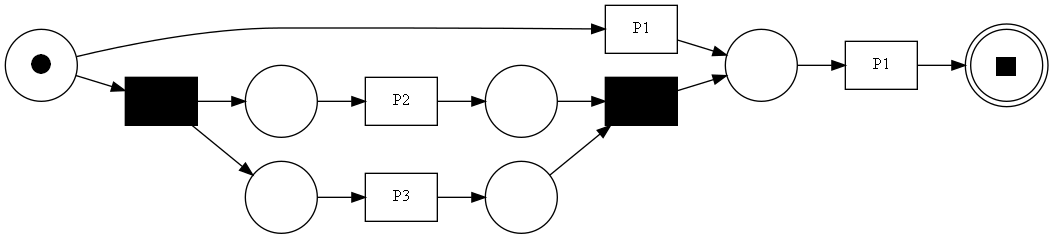

In [127]:
pm4py.view_petri_net(net, im, fm)

In [128]:
pm4py.write_petri_net(net, im, fm, file_path="example_material_petri_net.pnml")

C:\Users\Sebas\AppData\Local\Temp\ipykernel_15012\2877240686.py:1: DeprecatedWarning: write_petri_net is deprecated as of 2.2.2 and will be removed in 2.4.0. write_petri_net is deprecated, please use write_pnml
  pm4py.write_petri_net(net, im, fm, file_path="example_material_petri_net.pnml")


In [122]:
simulated_log = pm4py.play_out(net, im, fm)

In [123]:
df = pm4py.convert_to_dataframe(simulated_log)
columns = ['Process', 'Time', 'Case']
df.columns = columns
df.groupby(by='Case')['Process'].apply(tuple).unique()

array([('P1', 'P1'), ('P2', 'P3', 'P1'), ('P3', 'P2', 'P1')], dtype=object)

In [120]:
from copy import copy
from pm4py.objects.petri_net.semantics import ClassicSemantics

def get_available_transitions(net, current_marking, final_marking=None, semantics=ClassicSemantics()):
    """
    Return available transactions in net

    Parameters
    ----------
    net
        Petri net to play-out
    current_marking
        Current marking of the Petri net
    final_marking
        If provided, the final marking of the Petri net
    semantics
        Semantics of the Petri net to be used (default: petri_net.semantics.ClassicSemantics())
    """
    all_visited_elements = []

    visited_elements = []
    visible_transitions_visited = []

    marking = copy(current_marking)

    visited_elements.append(marking)

    if not semantics.enabled_transitions(net, marking):  # supports nets with possible deadlocks
        print("block")
    all_enabled_trans = semantics.enabled_transitions(net, marking)
    trans = list(all_enabled_trans)

    return trans

def get_marking_from_transition(net, current_marking, transition):
    return ClassicSemantics().execute(transition, net, current_marking)


trans = get_available_transitions(net=net, current_marking=im, final_marking=fm)
print("Possible transitions", trans)
new_marking = get_marking_from_transition(net, current_marking=im, transition=trans[0])
print("new marking", new_marking)
trans = get_available_transitions(net=net, current_marking=new_marking, final_marking=fm)
print("new available transitions", trans)
new_marking = get_marking_from_transition(net, current_marking=new_marking, transition=trans[0])
print("new marking", new_marking)
trans = get_available_transitions(net=net, current_marking=new_marking, final_marking=fm)
print("new available transitions", trans)
new_marking = get_marking_from_transition(net, current_marking=new_marking, transition=trans[0])
print("new marking", new_marking)
trans = get_available_transitions(net=net, current_marking=new_marking, final_marking=fm)
print("new available transitions", trans)
new_marking = get_marking_from_transition(net, current_marking=new_marking, transition=trans[0])
print("new marking", new_marking)
trans = get_available_transitions(net=net, current_marking=new_marking, final_marking=fm)
print("new available transitions", trans)
new_marking = get_marking_from_transition(net, current_marking=new_marking, transition=trans[0])
print("new marking", new_marking)
trans = get_available_transitions(net=net, current_marking=new_marking, final_marking=fm)
print("new available transitions", trans)

Possible transitions [(skip_11, None), (P1, 'P1')]
new marking ['State2:1', 'State3:1']
new available transitions [(P2, 'P2'), (P3, 'P3')]
new marking ['State3:1', 'State5:1']
new available transitions [(P3, 'P3')]
new marking ['State5:1', 'State6:1']
new available transitions [(skip_10, None)]
new marking ['State4:1']
new available transitions [(P4, 'P1')]
new marking ['Sink:1']
block
new available transitions []


In [102]:
net, im, fm = pm4py.read_pnml("example_material_petri_net.pnml")
pm4py.view_petri_net(net, im, fm)

OSError: Error reading file 'example_material_petri_net.pnml': failed to load external entity "example_material_petri_net.pnml"